# **Classification of Hand-Written Digits**
  The objective of the project is to build and train a model using Tensor-flow API to detect, and classify handwritten digits

###### - Shashank P

In [ ]:
# importing required modules

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
# Using minst data-set
# loading data to testing and training components

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# shape overview of data:
print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


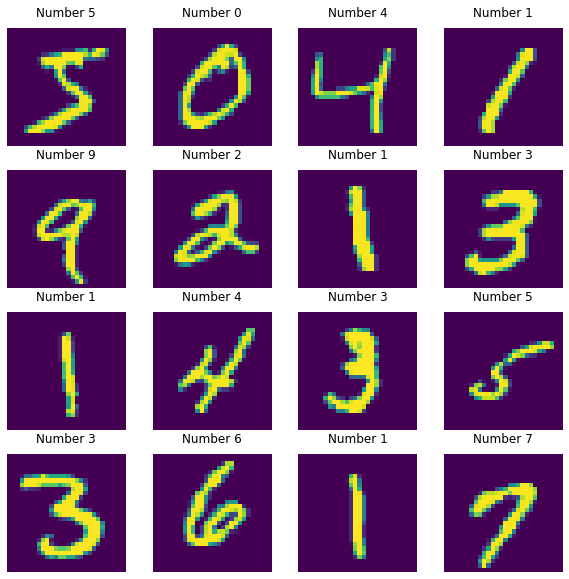

In [ ]:
# overview of data using matplotlib

%matplotlib inline
fig, axs = plt.subplots(4,4, figsize=(10, 10)) 

for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number {}'.format(y_train[i]))
fig.show()


## **PreProcessing the Data**
  Here, we are scaling, preprocessing the data that is going to used so as to reduce anomalies during training the model

In [ ]:
# reshape the image data-sets of training and testing (x_train, x_test)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1) # 1 - indicating 1 scale of color (greyscale)

In [ ]:
# converting the int-type to float-type

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# scale values of data to a range of (0, 1)
x_train /= 255
x_test /= 255

## **Building the Model**
  Building the models using different layers availabe through tensorflow 

In [ ]:
# model

model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [ ]:
# compiling and fitting the data into the model

model.compile(optimizer='adam', 
              loss= 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs= 3 )

Epoch 1/3
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2062 - accuracy: 0.9376
Epoch 2/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0860 - accuracy: 0.9737
Epoch 3/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0592 - accuracy: 0.9816


## **Evaluating the model**
  We are going to evaluate the performance of the model, by passing the tesing data and record the accuracy of the model

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0568 - accuracy: 0.9827


[0.05680077522993088, 0.982699990272522]